# **Educational Data Mining Tutorial**
#### This tutorial gives you skills to conduct exploratory data analysis using Python. For this purpose, we have used [HarvardX‐MITx	  Person-Course Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/26147). You can find more information about this dataset from this [report](http://poseidon01.ssrn.com/delivery.php?ID=351084105114076095079002116123117074037024090008032052023105012111104097092003064011059012033058039112110023086123098093085109103046069078020027011097080106097003089018040028024088008085113078083106095087027121022070099103106071008108091006000003017065&EXT=pdf). Our goal is to demonstrate how to import and prepare data for predictive modeling using Python.


# Part 1: Introduction

## 1.1 What predictive modeling _is_

A model just a mathematical equation and a way to relate that to reality. Take some observations, turn them into numbers if they aren't already numbers, do _something_ to them to turn those observations about a number, get a number out, interpret the number. 

Prediction: if the output of that model is a statement about the future, that's a prediction!



### 1.1.1 Importing python libraries

In [46]:
%matplotlib inline

# It is convention to import Pandas with the alias pd and Numpy with the alias np
import pandas as pd
import numpy as np

# import warnings library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# A few utilites we'll use
import random
import math

# For making plots
import matplotlib.pyplot as plt

# The machine learning 

from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelBinarizer





## 1.2 Linear Regression: A contrived example

There are fundamentally three kinds of predictions a computer can make:

+ Predicting a _number_. What score are you going to get on a test?
+ Predicting whether something is true or false. Are you going to pass the class? (This example only works if we assume that we don't care by what margin you pass!)
+ Predicting categories. Do I need to go straight, turn left, or turn right at this intersection? 

For most of this notebook, we'll work on making the second kind of prediction category (the third is similar, but we won't get to it) — but to clarify the math, let's briefly touch on the first time.

Imagine that you are a pediatrician in a small town. You observe that babies who are four months old tend to be about double the weight their birth weight. This is a predictive model! (If you actually use this idea to make a prediction.)

We can put numbers to this. Let's say that in the first week of January, three babies are born in your hospital:

In [47]:
birth_weight_kg = np.array([2.5, 3.0, 3.5])

And at their four-month checkup in the first week of May, those same three babies weigh:

In [48]:
four_month_weight_kg = np.array([5.0, 6.1, 6.8])

So we can form a linear model, which will look a whole lot like an equation we teach in high school.

If 

+ $B = \text{birth weight}$
+ $F = \text{four month weight}$

then we could build a _linear model_ like so:

$$F = \beta_0 + \beta_1 \cdot B + \epsilon$$

We could use the [method of least squares](https://en.wikipedia.org/wiki/Least_squares) to find the values of $\beta$ that minimize the errors ($\epsilon$). For this data set, the optimal value of $\beta$ is

+ $\beta_0 = 0.5667$
+ $\beta_1 = 1.8$

So you could use this model to tell a new parent whose child was born on June 1, weighing 3.25 kilograms, that on October 1, their child will weigh 6.41 kilograms. This is a predictive model. It's important to emphasize that by _far_ the biggest problem with this model is the size of the data set we used to make the prediction. While more complex mathematical relationships between what you're predicting and what evidence you are using to make that prediction certainly exist, linear models are frequently perfectly useful in the real world!



In [49]:
first_linear_model = linear_model.LinearRegression()
first_linear_model.fit(birth_weight_kg.reshape(-1, 1), four_month_weight_kg.reshape(-1, 1))
first_linear_model.predict(3.25)

array([[ 6.41666667]])

---
# 1.3 - Binary Classification using Logistic Regression

Binary classification problems are very common in several areas which utilize machine learning. 
Some examples of common binary classification problems are:

* Predicting if a patient does or does not have a disease
* Predicting if an email is spam or not
* Predicting if a student will drop out of high school or not

There are several advanced methods for binary classification such as decision trees, random forests, and neural networks to name a few.
For our exercises, we will utilize [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) for our binary classification to determine if students will obtain certification in their course or not.

For this exercise, we will predict whether a student earned a certificate based on the other information we have about them.

## 1.3.1 - Logistic Regression Basics
Logistic regression is similar to standard linear regression — it uses a linear modeling equation, but it takes the output of this equation and puts it through a function that produces a probability (between 0 and 1) instead of an arbitrary number.

As in a linear regression, the goal is to determine the best weights (\beta) to predict a binary outcome (y) given features x. ![alt text](https://upload.wikimedia.org/math/1/e/6/1e673e003f3880eebd73d5043e80c07c.png "Linear Equation")
In the simple case of 1 feature, the linear equation is ![alt text](https://upload.wikimedia.org/math/c/7/3/c739c3018912dbc27b4c2799e8dc8033.png "Basic Linear Equation") where x is the singular feature.
The probability for a 1 label, in our case the probability for that a given student will obtain a certificate, is given by the sigmoid of the linear equation. ![alt text](https://upload.wikimedia.org/math/5/6/f/56fc4a24b7084ff8f218aaeb5bfe1c4e.png "Success Probability")

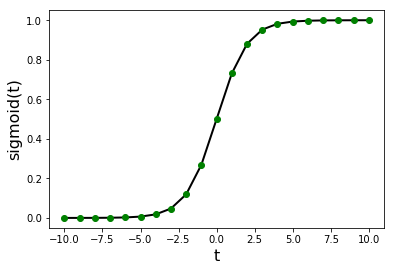

In [50]:
def sigmoid(t):
    return 1.0 / (1.0 + math.exp(-t))

t = range(-10, 11); f = [sigmoid(i) for i in t]
plt.plot(t,f,'k', linewidth=2)
plt.plot(t,f,'go')
plt.xlabel('t', fontsize=16)
plt.ylabel('sigmoid(t)', fontsize=16)
plt.show()

Once the fitting parameters (weights) are found, the value of t can be found for any set of feature inputs.
The predicting probability for a 1 label for the set of features is found using the sigmoid on t.
The threshold for success from the sigmoid can also be altered.
Most machine learning packages have the default threshold as 0.5, but this can be optimized for specific situations.
For example, classifiers for the existence of a tumor in a patient might lower the threshold from 0.5 to 0.2 to ensure a higher true-postitive rate at the cost of an increased false-positive rate.

---
## 1.3.2 - Another contrived example: passing a test
The [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression#Example:_Probability_of_passing_an_exam_versus_hours_of_study) has an  example about students on students studying to pass a test that might be useful. 

We will start with data for a few students on how many hours they studied, and a binary label for if they passed the test or not.

Using this data, we will fit a logistic regression model for an intercept and a weight for the feature (B0 and B1).

We will then be able to use the fit parameters to predict if a student passes given the number of hours they study.

### Define the data to train the classifier
We will define the testing and training data using pandas. Pandas is very useful when you're trying to read in data from CSV files but a little bit clunkier when you're typing the data in — but we only have to do this once.

In [51]:
training_example_data = pd.DataFrame([
    (0.5, 0), (0.75, 0), (1.0, 0), (1.25, 0), (1.5, 0), (1.75, 0), (1.75, 1),
    (2.0, 0), (2.25, 1), (2.5, 0), (2.75, 1), (3.0, 0), (3.25, 1), (3.5, 0),
    (4.0, 1), (4.25, 1), (4.5, 0), (4.75, 1), (5.0, 1), (5.5, 1)
    ], 
    columns=["hours_studied", "pass"]
)
training_example_data

,hours_studied,pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


### Using scikit-learn, train a classifier using logistic regression

In [52]:
# Create a logistic regression model from scikit learn
logreg_example = linear_model.LogisticRegression()

# Fit the logistic regression model using the training data
logreg_example.fit(training_example_data[["hours_studied"]], training_example_data[["pass"]])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Using the trained classifier, plot its predictions over a range of study times

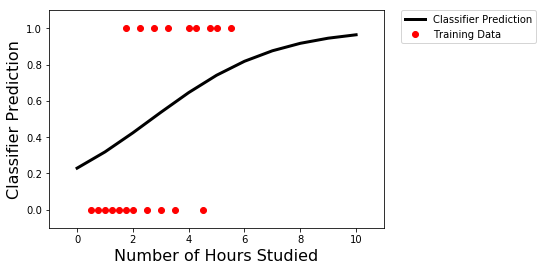

In [53]:
# Define a list of hours to get predictions from the classifier
hours = np.arange(0,11)

# Get predictions for every hour
both_predictions = logreg_example.predict_proba(hours.reshape(-1,1))
predictions = [x[1] for x in both_predictions]

# Create a plot of the classifer prediction vs number of hours studied
plt.plot(hours, predictions, 'k', linewidth=3, label='Classifier Prediction')
plt.plot(training_example_data[["hours_studied"]], training_example_data[["pass"]], 'ro', label='Training Data')
plt.xlabel('Number of Hours Studied', fontsize=16)
plt.ylabel('Classifier Prediction', fontsize=16)
plt.xlim([-1, 11]); plt.ylim([-0.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### What do we notice about this prediction?

#### How to decide how good a binary prediction is.

- Notice that what we're actually getting is a number between 0 and 1. 
- It would make sense to say everything over 0.5 is "probably going to pass" and everything under 0.5 is "probably going to fail", _but_: 
    + If we really want to make sure that students don't fail, we could warn all students with a score under 0.8. 
    + Or if we're worryied about crying wolf, we could only warn students with a score under 0.2. 
- Doing this lets us trade off some potential false negatives for false positives.

+ It is not wrong to use accuracy (fraction of predictions that are correct) to describe the quality of a prediction.
+ But in many situations, precision and recall are more useful. 

[https://en.wikipedia.org/wiki/Precision_and_recall]()
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width=35%>

In [54]:
example_predictions = pd.Series(
    logreg_example.predict(training_example_data["hours_studied"].reshape(-1, 1)), 
    index=training_example_data.index,
    name="prediction"
)
example_predictions = pd.concat([training_example_data, example_predictions], axis=1)
example_predictions

,hours_studied,pass,prediction
0,0.50,0,0
1,0.75,0,0
2,1.00,0,0
3,1.25,0,0
4,1.50,0,0
5,1.75,0,0
6,1.75,1,0
7,2.00,0,0
8,2.25,1,0
9,2.50,0,0


In [55]:
print(classification_report(example_predictions[["pass"]], example_predictions[["prediction"]]))
print("Accuracy:", accuracy_score(example_predictions[["pass"]], example_predictions[["prediction"]]))

             precision    recall  f1-score   support

          0       0.80      0.73      0.76        11
          1       0.70      0.78      0.74         9

avg / total       0.76      0.75      0.75        20

Accuracy: 0.75


#### ROC curves and AUC
Our next metric for testing the accuracy of our classifier is to plot the ROC curve and calculate the AUC of the ROC.
In general, the ROC curve is plotted by calculating the True Posative Rate (TPR) and False Positive Rate (FPR) for the classifier as the threshold is moved from 0 to 1. 

[Image credit: Jack Weiss, UNC]
![alt text](https://www.unc.edu/courses/2008fall/ecol/563/001/images/lectures/lecture18/fig4.png)

The ROC allows you to see a different aspect of the classifier and allows you to decide what the best threshold is for your model.

We will use built in Scikit-Learn functions to get the TPR and FPR as well as calculate the AUC.
We will then plot the results.

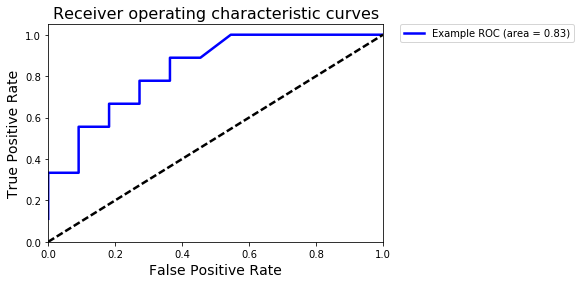

In [56]:
# Get a list of the raw prediction scores for the testing data
example_score = logreg_example.decision_function(training_example_data["hours_studied"].reshape(-1, 1))
example_observation = example_predictions[["pass"]]

# Get the false positive rates (FPR) and true posative rates (TPR)
fpr_example, tpr_example, _ = roc_curve(example_observation, example_score)

# # Calculate the AUC from the FPR and TPR
auc_roc_example = auc(fpr_example, tpr_example)

plt.figure()
plt.plot(fpr_example, tpr_example, 'b', linewidth=2.5, label='Example ROC (area = {:0.2f})'.format(auc_roc_example))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver operating characteristic curves', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 2: A real-world example: the HarvardX‐MITX	  Person-Course	  dataset


To get a better feel for how predictive modeling works, we will use Kaggle data from HarvardX and MITX. We're going to be looking at this data to try to predict whether students completed a MOOC.

In the year from the fall of 2012 to the summer of 2013, the first 17 HarvardX and MITx
courses launched on the edX platform. In that year, 

* 43,196 registrants earned certificates of completion
* Another 35,937 registrants explored half or more of course content without certification
* An additional 469,702 registrants viewed less than half of the content
* And 292,852 registrants never engaged with the online content
* In total, there were 841,687 registrations from 597,692 unique users across the first year of HarvardX and MITx courses

You can download the dataset from  [HarvardX‐MITx	  Person-Course Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/26147).

# 2.1 **For licensing reasons, you will need to download this data using your web browser, then upload it to Azure.**

Let's take a minute to walk through that now.

## 2.2 Data exploration using Python

Python has several packages that make data analysis and modeling easy. One very popular package for working with tabular data is called [Pandas](http://pandas.pydata.org/). We can load this CSV file we just downloaded with Pandas and explore it in just a few lines of code.

In [57]:
# Read data
df = pd.read_csv('../HMXPC13_DI_v2_5-14-14.csv',  parse_dates=['start_time_DI','last_event_DI'])

# Look at first 5 rows of data
df.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9.0,NaN,NaN,0,NaN,1.0
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaT,NaN,9.0,NaN,1.0,0,NaN,1.0
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16.0,NaN,NaN,0,NaN,1.0
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaT,NaN,16.0,NaN,NaN,0,NaN,1.0
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaT,NaN,16.0,NaN,NaN,0,NaN,1.0


And generating summary statistics is as easy as

In [58]:
# View summary statistics
df.describe()

,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
count,641138.0,641138.000000,641138.000000,641138.000000,544533.000000,441987.000000,478395.000000,183608.000000,382385.000000,641138.000000,0.0,100161.0
mean,1.0,0.624299,0.061899,0.027587,1985.253279,431.008018,5.710254,114.844173,3.634423,0.018968,NaN,1.0
std,0.0,0.484304,0.240973,0.163786,8.891814,1516.116057,11.866471,426.996844,4.490987,0.229539,NaN,0.0
min,1.0,0.000000,0.000000,0.000000,1931.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,1.0
25%,1.0,0.000000,0.000000,0.000000,1982.000000,3.000000,1.000000,5.000000,1.000000,0.000000,NaN,1.0
50%,1.0,1.000000,0.000000,0.000000,1988.000000,24.000000,2.000000,18.000000,2.000000,0.000000,NaN,1.0
75%,1.0,1.000000,0.000000,0.000000,1991.000000,158.000000,4.000000,73.000000,4.000000,0.000000,NaN,1.0
max,1.0,1.000000,1.000000,1.000000,2013.000000,197757.000000,205.000000,98517.000000,48.000000,20.000000,NaN,1.0


### 2.3 Let's take a minute to explore the data dictionary
[https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/26147]()

From this, we can get some useful information about the data set.

In [59]:
print('Number of records: ')
print(df.shape[0]) 
print('Number of courses: ')
print(df.course_id.nunique())
print('Number of students: ')
print(df.userid_DI.nunique())

Number of records: 
641138
Number of courses: 
16
Number of students: 
476532


# 2.4 Cleaning the data

Cleaning data is extremely important, but basically the subject of its own hour-long lecture. In the following cell, we're going to run some dense code that

+ Removes all children who were under the age of 8 when this dataset was collected
+ Adds an "Age" column, calculated from the "YoB" column.
+ Adds a "english_speaking" column, calculated from the "final_cc_cname_DI" column, using a pre-defined list of English-dominant countries.
+ Adds a "Country_US" column, calculated from the same column, checking just whether the person is in the United States.
+ Replaces missing cells in the Level of Education column (`LoE_DI`) with "NA"
+ Adds a column that specifies just the university through which the course was offered, calculated from the `course_id`.
+ Removes students with no grade data at all.

In [60]:
df = df[df.YoB<=2004]
df['Age'] = df['YoB'].apply(lambda x: 2012 - x)

# We are using a pretty conservative definition of "English Speaking" here
# 
english_speaking = ['United States','Australia','India','Canada'
                    ,'United Kingdom', 'Nigeria', 'Philippines']

df['english_speaking'] = df['final_cc_cname_DI'].apply(lambda x: 1 if x in english_speaking else 0)
df['Country_US'] = df['final_cc_cname_DI'].apply(lambda x: 1 if x=='United States' else 0)
df['LoE_DI'] = df['LoE_DI'].fillna('NA')
df['college'] = df['course_id'].apply(lambda x: x[:x.find('/')])
df = df[df.grade != ' ']
df = df.fillna(0)
df.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,...,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag,Age,english_speaking,Country_US,college
19330,HarvardX/CS50x/2012,MHxPC130422039,1,0,0,0,Unknown/Other,Secondary,1987.0,m,...,0.0,0.0,0.0,0,0.0,0.0,25.0,0,0,HarvardX
19331,HarvardX/CS50x/2012,MHxPC130407931,1,0,0,0,United States,Secondary,1968.0,f,...,0.0,0.0,0.0,0,0.0,0.0,44.0,1,1,HarvardX
19332,HarvardX/PH207x/2012_Fall,MHxPC130313697,1,0,0,0,India,Bachelor's,1989.0,m,...,3.0,0.0,0.0,0,0.0,0.0,23.0,1,0,HarvardX
19333,HarvardX/CS50x/2012,MHxPC130064950,1,0,0,0,Unknown/Other,Master's,1978.0,m,...,0.0,0.0,0.0,0,0.0,0.0,34.0,0,0,HarvardX
19334,HarvardX/PH207x/2012_Fall,MHxPC130237753,1,1,0,0,United States,Secondary,1993.0,m,...,8.0,7.0,2.0,0,0.0,0.0,19.0,1,1,HarvardX


# 3: Building a model, 

## Some problem statements

Now that we have cleaned our dataset and created some derived features, we are ready to start building predictive models.
We are attempting to build two types of predictive models.
1. Supervised learning
  * Train the model using labeled data
  * Predict whether a student gets certified for their course
    * certified=0 -> Student does not get certified
    * certified=1 -> Student gets certified
    * Binary classification problem
2. Unsupervised learning
  * Train the model with un-labeled data
  * Group students into clusters based on their features
  * This could be useful for helping a person with knowledge of the field make inferences about what's going on, but unsupervised learning can't make the prediction for you.


To make sure we all start with the clean data produced from the first part of this tutorial, we will import the cleaned data into a dataframe and work with it from there.

In [64]:
cleaned_df_all = df.copy()
cleaned_df_all.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,...,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag,Age,english_speaking,Country_US,college
19330,HarvardX/CS50x/2012,MHxPC130422039,1,0,0,0,Unknown/Other,Secondary,1987.0,m,...,0.0,0.0,0.0,0,0.0,0.0,25.0,0,0,HarvardX
19331,HarvardX/CS50x/2012,MHxPC130407931,1,0,0,0,United States,Secondary,1968.0,f,...,0.0,0.0,0.0,0,0.0,0.0,44.0,1,1,HarvardX
19332,HarvardX/PH207x/2012_Fall,MHxPC130313697,1,0,0,0,India,Bachelor's,1989.0,m,...,3.0,0.0,0.0,0,0.0,0.0,23.0,1,0,HarvardX
19333,HarvardX/CS50x/2012,MHxPC130064950,1,0,0,0,Unknown/Other,Master's,1978.0,m,...,0.0,0.0,0.0,0,0.0,0.0,34.0,0,0,HarvardX
19334,HarvardX/PH207x/2012_Fall,MHxPC130237753,1,1,0,0,United States,Secondary,1993.0,m,...,8.0,7.0,2.0,0,0.0,0.0,19.0,1,1,HarvardX


## 3.1 - Selecting features
We need to think about our features as a first step to building our classifier.
Let's narrow our features down to the following list:

### Feature List
* _Student Traits_ - Features about the individual student not related to their interaction with the course at all
  * __english_speaking__ (binary) student lives in an English speaking country
  * __education__ (int) {"Bachelor's": 1, "Doctorate": 4, "Less than Secondary": 5, "Master's": 2, "None": 3, "Secondary": 0}
  * __Age__ (int) student age in years
* _Course Interactions_ - Features about the individual student interacting with the different aspects of the course
  * __nplay_video__ (int) number of videos the student played within the course
  * __nforum_posts__ (int) number of times the student posted to the forum for the course
* _Super Features_ - Features which are extremely predictive
  * __nevents__ (int) number of times the student interacted with the course
  * __nchapters__ (int) number of chapters within the course that the student interacted with

Let's start by defining lists for our diffent feature groups which we will use to filter the full dataset dataframe.

In [65]:
student_trait_features      = ["english_speaking", "LoE_DI", "Age"]

We will now develop a logisic regression classifier using only the student_traits_features.
We will accomplish this step-by-step at first, followed by building a simple function utilizing all the steps.

### Let's start by just looking at the student trait features
We will start by only using the student trait features to build our classifier.

In [66]:
# Define a list of column names to keep from the main dataset
# We are specifically putting the classifcation label column "certified"
# as the last element of the list
features_label = student_trait_features + ["certified"]

cleaned_df = cleaned_df_all.copy()
# Get a new dataframe that only contains columns from the features_label list
cleaned_df = cleaned_df[features_label]
print("Total of "+str(cleaned_df.shape[0])+" datapoints")
cleaned_df.head()

Total of 535641 datapoints


,english_speaking,LoE_DI,Age,certified
19330,0,Secondary,25.0,0
19331,1,Secondary,44.0,0
19332,1,Bachelor's,23.0,0
19333,0,Master's,34.0,0
19334,1,Secondary,19.0,0


## 3.2 One-hot encoding

### Problem: We can't use a name as a feature.

$(\beta_1 \cdot \text{Secondary})$ isn't a number you can add to $\beta_0 \cdot 1$

Should we turn it into a number?

In [67]:
cleaned_df.LoE_DI.unique()

array(['Secondary', "Bachelor's", "Master's", 'NA', 'Doctorate',
       'Less than Secondary'], dtype=object)

In [69]:
# 

In [70]:
cleaned_df['education_level'] = cleaned_df.LoE_DI.map(
    {
        'NA':0, 
         'Less than Secondary':1,
         'Secondary':2, 
         "Bachelor's":3, 
         "Master's":4,
         'Doctorate':5
    }
)
cleaned_df.head()

,english_speaking,LoE_DI,Age,certified,education_level
19330,0,Secondary,25.0,0,2
19331,1,Secondary,44.0,0,2
19332,1,Bachelor's,23.0,0,3
19333,0,Master's,34.0,0,4
19334,1,Secondary,19.0,0,2


### But really, this isn't really a number.

+ "Secondary" isn't twice as much education as "Less than Secondary", and "Bachelors" isn't 1.5 times as much education as "Secondary".
+ It really is a category!
+ We use a trick called [one-hot encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) to deal with this.
+ Turn each category of education into its own category that can be zero or one.
+ This way weights can be found separately for each category.

In [71]:
labeler = LabelBinarizer()
labeler.fit(cleaned_df.education_level)
labels = ["education_{}".format(x) for x in list(labeler.classes_)]
education = pd.DataFrame(labeler.transform(cleaned_df.education_level), columns=labels, index = cleaned_df.index)

cleaned_df_onehot = pd.concat([cleaned_df.drop(['LoE_DI', 'education_level'], axis=1), education], axis=1)

In [72]:
cleaned_df_onehot.head()

,english_speaking,Age,certified,education_0,education_1,education_2,education_3,education_4,education_5
19330,0,25.0,0,0,0,1,0,0,0
19331,1,44.0,0,0,0,1,0,0,0
19332,1,23.0,0,0,0,0,1,0,0
19333,0,34.0,0,0,0,0,0,1,0
19334,1,19.0,0,0,0,1,0,0,0


In [77]:
cleaned_df_all_onehot = pd.concat([cleaned_df_all.drop('LoE_DI', axis=1), education], axis=1)
cleaned_df_all_onehot.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,YoB,gender,grade,...,Age,english_speaking,Country_US,college,education_0,education_1,education_2,education_3,education_4,education_5
19330,HarvardX/CS50x/2012,MHxPC130422039,1,0,0,0,Unknown/Other,1987.0,m,0,...,25.0,0,0,HarvardX,0,0,1,0,0,0
19331,HarvardX/CS50x/2012,MHxPC130407931,1,0,0,0,United States,1968.0,f,0,...,44.0,1,1,HarvardX,0,0,1,0,0,0
19332,HarvardX/PH207x/2012_Fall,MHxPC130313697,1,0,0,0,India,1989.0,m,0,...,23.0,1,0,HarvardX,0,0,0,1,0,0
19333,HarvardX/CS50x/2012,MHxPC130064950,1,0,0,0,Unknown/Other,1978.0,m,0.0,...,34.0,0,0,HarvardX,0,0,0,0,1,0
19334,HarvardX/PH207x/2012_Fall,MHxPC130237753,1,1,0,0,United States,1993.0,m,0,...,19.0,1,1,HarvardX,0,0,1,0,0,0


In [78]:
cleaned_df_onehot.shape

(535641, 9)

## 3.3 Cross Validation

Now our dataframe is something we can do math on: the features are numbers and the prediction ("certified") is a number. 

One more issue to be aware of: it's really best to test your model on a different dataset than the data set from the one you trained it on — this is called cross-validation. [Overfitting](https://www.coursera.org/learn/machine-learning/lecture/ACpTQ/the-problem-of-overfitting) is always a risk — maybe the model learned something about your data that doesn't generalize to the world at large. (If Alice gets the highest score in the class and you didn't cross-validate your model, then a model that predicts that people named Alice are going to get better grades than people not named Alice is going to look like a new one.)

The simplest solution to this problem is to just take your data set and split it into two groups: one for training the model and one for testing it. 70/30 and 80/20 are frequently-used splits, there's no hard rule. 

In [79]:
# Create a list of datapoints from the dataframe
# Each element in the list will be a tuple with the form (label, features)
# where label is either 1 or 0, and features is a list of the features from the dataframe

Y_all = cleaned_df_onehot['certified']
X_all = cleaned_df_onehot.drop('certified', 1)

X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=.2, random_state=0)
# Print information about the training and testing datasets
print("{} training points\t {:2.2f} percent of total".format(len(X_train), 100*len(X_train)/float(cleaned_df_onehot.shape[0])))
print("{} testing points \t {:2.2f} percent of total".format(len(X_test), 100*len(X_test)/float(cleaned_df_onehot.shape[0])))
      
      
      


428512 training points	 80.00 percent of total
107129 testing points 	 20.00 percent of total


### 3.4: Training a classifier with training data
We will train the classifier the exact same way we did previously with the example.

In [80]:
# Create a logistic regression model from scikit learn
logreg = linear_model.LogisticRegression()

# Fit the logistic regression model using the training data
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
print(X_train.columns)
logreg.coef_

Index(['english_speaking', 'Age', 'education_0', 'education_1', 'education_2',
       'education_3', 'education_4', 'education_5'],
      dtype='object')


array([[ 0.08956938, -0.01739217, -1.42234241, -0.40916528, -0.58024048,
        -0.51956505,  0.05259413,  0.05098006]])

### 3.5: Checking the accuracy of the classifier with the testing data
We will perform two types of accuracy checks for our classifier.
* Calculate the percent error in predicting the testing data using the default 0.5 threshold
* Calculate the Recieving Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) for the classifier predicting the testing data

#### Percent errors
Calculating percent errors is a simple way to see how your classifier is doing for a given threshold (default is 0.5) on both 0 and 1 labels from the testing dataset.
We will calculate the total percent error (all testing points) as well as the percent error for 0 and 1 labeled points individually.
To do this, we simply need to get counts for the total number of testing points, number of 0 labeled testing points, number of 1 labeled testing points, and the number of incorrect predictions for each.
The percent errors are then calculated as ratios of incorrect to total number of points.

In [82]:
# We want to get a list of predictions (0,1) for our list of testing data
Y_pred = logreg.predict(X_test)

# Total number of testing points
N = len(Y_test)

# Total number of 0 label testing points
N_0_label = sum([1 if y==0.0 else 0 for y in Y_test])

# Total number of 1 label testing points
N_1_label = sum([1 if y==1.0 else 0 for y in Y_test])

# Get the total number of incorrectly predicted testing points
N_tot_incorrect = sum([1 if Y_pred[i]!=Y_test.iloc[i] else 0 for i in range(len(Y_test))])

# Get the number of incorrectly predicted label 0 testing points
N_0_incorrect = sum([1 if (Y_pred[i]!=Y_test.iloc[i]) and (Y_test.iloc[i]==0.0) else 0 for i in range(len(Y_test))])

# Get the number of incorrectly predicted label 1 testing points
N_1_incorrect = sum([1 if (Y_pred[i]!=Y_test.iloc[i]) and (Y_test.iloc[i]==1.0) else 0 for i in range(len(Y_test))])

print(str(N)+" total testing points")
print("%.2f percent 0 labels" % (N_0_label*100.0/float(N)))
print("%.2f percent 1 labels" % (N_1_label*100.0/float(N)))
print("\nTotal percent error   -> %.2f" % (100.0*N_tot_incorrect/float(N)))
print("Label 0 percent error -> %.2f" % (100.0*N_0_incorrect/float(N_0_label)))
print("Label 1 percent error -> %.2f" % (100.0*N_1_incorrect/float(N_1_label)))

107129 total testing points
97.40 percent 0 labels
2.60 percent 1 labels

Total percent error   -> 2.60
Label 0 percent error -> 0.00
Label 1 percent error -> 100.00


In [83]:
print(classification_report(Y_test, Y_pred))
print("Accuracy: ",accuracy_score(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99    104346
          1       0.00      0.00      0.00      2783

avg / total       0.95      0.97      0.96    107129

Accuracy:  0.974021973509


In [84]:
## 3.6: AUCROC of our first model

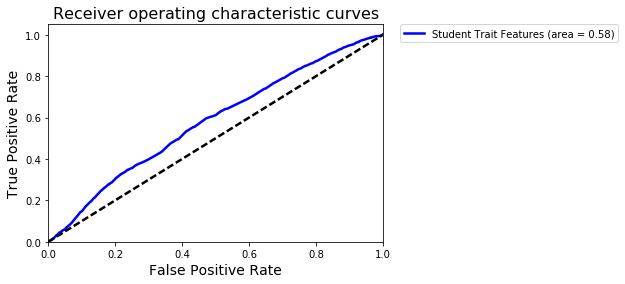

In [85]:
# Get a list of the raw prediction scores for the testing data
Y_score = logreg.decision_function(X_test)

# Get the false positive rates (FPR) and true posative rates (TPR)
fpr, tpr, _ = roc_curve(Y_test, Y_score)

# Calculate the AUC from the FPR and TPR
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, 'b', linewidth=2.5, label='Student Trait Features (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver operating characteristic curves', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### We just fit a model! 
#### …But it is barely better than a coin toss. 

+ This could be because the logistic model isn't good for predicting certification.
+ It could be because the data doesn't have any predictive power for this outcome.
    + Beware: it's always possible that _no_ data will _ever_ have predictive power. It really isn't possible to predict a coin toss!

Good rule of thumb: if your AUCROC is under ~0.7 and you're using a logistic regression, it's probably a better idea to look for better data than to look at more complex models. (Corollary: if your AUCROC is better than ~0.9 and you need it to be better still, it's _definitely_ time to look at more complex models.)

## 3.7: This is getting to be a lot of typing. Let's define some functions that we can use.

In [86]:
def train_classifier(data_df, feature_list, prediction_value="certified"):
    # Define a list of column names to keep from the main dataset
    # We are specifically putting the classifcation label column "certified"
    # as the last element of the list
    features_label = feature_list + [prediction_value]

    # Get a new dataframe that only contains columns from the features_label list
    cleaned_df = data_df[features_label]

    # Create a list of datapoints from the dataframe
    # Each element in the list will be a tuple with the form (label, features)
    # where label is either 1 or 0, and features is a list of the features from the dataframe
    clean_datapoints = map(list, cleaned_df.values)
    clean_labeledpoints = [(x[-1], x[:-1]) for x in clean_datapoints]

    Y_all = [x[0] for x in clean_labeledpoints]
    X_all = [x[1] for x in clean_labeledpoints]

    X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=.2, random_state=0)
    
    # Create a logistic regression model from scikit learn
    logreg = linear_model.LogisticRegression()

    # Fit the logistic regression model using the training data
    logreg.fit(X_train, Y_train)
    
    return (logreg, (X_train, Y_train), (X_test, Y_test))

In [87]:
def test_classifier(classifier, testing_data, threshold=0.5):
    from sklearn.metrics import roc_curve, auc

    # Unpack features and lables from testing data
    (X_test, Y_test) = testing_data
    
    # We want to get a list of predictions (0,1) for our list of testing data
    Y_pred = [1.0 if i[1] >= threshold else 0.0 for i in classifier.predict_proba(X_test)]

    # Total number of testing points
    N = len(Y_test)

    # Total number of 0 and 1 label testing points
    N_0_label = sum([1 if y==0.0 else 0 for y in Y_test])
    N_1_label = sum([1 if y==1.0 else 0 for y in Y_test])

    # Get the total number of incorrectly predicted testing points
    N_tot_incorrect = sum([1 if Y_pred[i]!=Y_test[i] else 0 for i in range(len(Y_test))])

    # Get the number of incorrectly predicted label 0 and 1 testing points
    N_0_incorrect = sum([1 if (Y_pred[i]!=Y_test[i]) and (Y_test[i]==0.0) else 0 for i in range(len(Y_test))])
    N_1_incorrect = sum([1 if (Y_pred[i]!=Y_test[i]) and (Y_test[i]==1.0) else 0 for i in range(len(Y_test))])

    # Compute total percent error
    err_tot = 100.0*N_tot_incorrect / float(N)
    
    # Compute percent error for 0 and 1 labels
    err_0 = 100*N_0_incorrect / float(N_0_label)
    err_1 = 100*N_1_incorrect / float(N_1_label)
    
    # Compute TPR and FPR for the threshold
    # Recall: TPR = (number of correctly predicted 1 labels) / (total number of 1 labels)
    # Recall: FPR = (number of incorrectly predicted 0 labels) / (total number of 0 labels)
    this_tpr = (N_1_label - N_1_incorrect) / float(N_1_label)
    this_fpr = (N_0_incorrect) / float(N_0_label)

    print(str(N)+" total testing points")
    print("%.2f percent 0 labels" % (N_0_label*100.0/float(N)))
    print("%.2f percent 1 labels" % (N_1_label*100.0/float(N)))
    print("\nTotal percent error   -> %.2f" % (err_tot))
    print("Label 0 percent error -> %.2f" % (err_0))
    print("Label 1 percent error -> %.2f" % (err_1))
    
    # Get a list of the raw prediction scores for the testing data
    Y_score = classifier.decision_function(X_test)

    # Get the false positive rates (FPR) and true posative rates (TPR)
    fpr, tpr, _ = roc_curve(Y_test, Y_score)

    # Calculate the AUC from the FPR and TPR
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, 'b', linewidth=2.5, label='Current ROC (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2.5)
    plt.plot(this_fpr, this_tpr, 'ro', linewidth=3, label="Current Threshold = %0.2f" % threshold)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver operating characteristic curves', fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    return (err_tot, err_0, err_1, fpr, tpr, roc_auc)

### 3.8 - Testing our new functions to recreate the classifier using student_trait_features
Now that we have our functions __train_classifier__ and __test_classifier__ defined, let's try to recreate our previous results training a classifier using only __student_trait_features__. 

In [90]:
cleaned_df_all = cleaned_df_all_onehot.copy()
cleaned_df_all.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,YoB,gender,grade,...,Age,english_speaking,Country_US,college,education_0,education_1,education_2,education_3,education_4,education_5
19330,HarvardX/CS50x/2012,MHxPC130422039,1,0,0,0,Unknown/Other,1987.0,m,0,...,25.0,0,0,HarvardX,0,0,1,0,0,0
19331,HarvardX/CS50x/2012,MHxPC130407931,1,0,0,0,United States,1968.0,f,0,...,44.0,1,1,HarvardX,0,0,1,0,0,0
19332,HarvardX/PH207x/2012_Fall,MHxPC130313697,1,0,0,0,India,1989.0,m,0,...,23.0,1,0,HarvardX,0,0,0,1,0,0
19333,HarvardX/CS50x/2012,MHxPC130064950,1,0,0,0,Unknown/Other,1978.0,m,0.0,...,34.0,0,0,HarvardX,0,0,0,0,1,0
19334,HarvardX/PH207x/2012_Fall,MHxPC130237753,1,1,0,0,United States,1993.0,m,0,...,19.0,1,1,HarvardX,0,0,1,0,0,0


In [91]:
student_trait_features = ['english_speaking', 'Age', 'education_0', 'education_1', 'education_2', 'education_3', 'education_4', 'education_5']
course_interaction_features = ["nplay_video", "nforum_posts"]
super_features              = ["nevents", "nchapters"]

107129 total testing points
97.40 percent 0 labels
2.60 percent 1 labels

Total percent error   -> 2.60
Label 0 percent error -> 0.00
Label 1 percent error -> 100.00


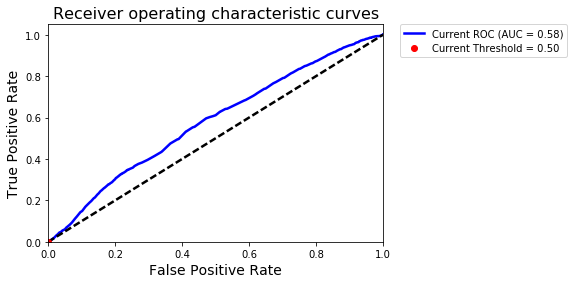

In [92]:
(classifier, training_data, testing_data) = train_classifier(cleaned_df_all, student_trait_features)
(err_tot, err_0, err_1, fpr, tpr, auc) = test_classifier(classifier, testing_data)

### 3.9 - Using our new functions to compare ROC curves for our 3 features groups
Let's now use our functions __train_classifier__ and __test_classifier__ to obtain fpr, tpr, and auc data for each of our three groups of features:
```
student_trait_features      = ["english_speaking", "Age", "education_0",
                               "education_1","education_2", "education_3", 
                               "education_4", "education_5"]
course_interaction_features = ["nplay_video", "nforum_posts"]
super_features              = ["nevents", "nchapters"]
```

We will then plot ROC curves for all three features groups on the same plot for comparision.

107129 total testing points
97.40 percent 0 labels
2.60 percent 1 labels

Total percent error   -> 39.23
Label 0 percent error -> 38.94
Label 1 percent error -> 50.41


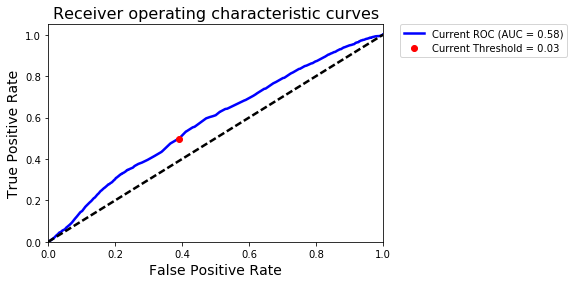

107129 total testing points
97.40 percent 0 labels
2.60 percent 1 labels

Total percent error   -> 2.60
Label 0 percent error -> 0.00
Label 1 percent error -> 100.00


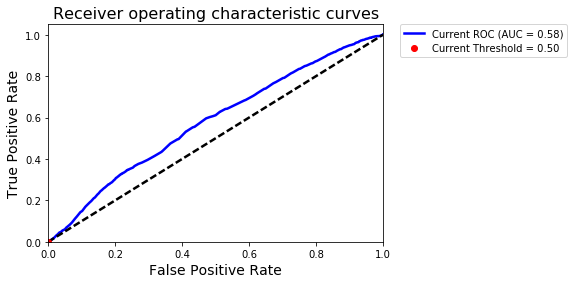

In [93]:
##### student_trait_features
#(classifier, training_data, testing_data) = train_classifier(cleaned_df_all, student_trait_features)
(err_tot, err_0, err_1, fpr_st, tpr_st, auc_st) = test_classifier(classifier, testing_data, threshold = 0.025)
(classifier, training_data, testing_data) = train_classifier(cleaned_df_all, student_trait_features)
(err_tot, err_0, err_1, fpr, tpr, auc) = test_classifier(classifier, testing_data)

107129 total testing points
97.40 percent 0 labels
2.60 percent 1 labels

Total percent error   -> 12.60
Label 0 percent error -> 12.13
Label 1 percent error -> 30.29


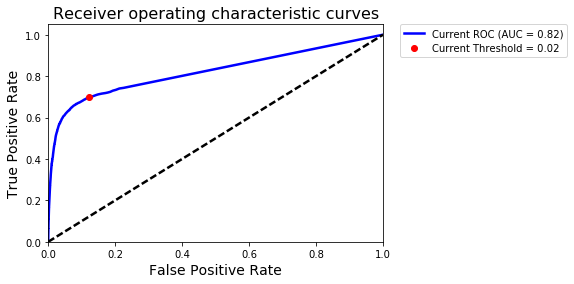

In [94]:
# course_interaction_features
(classifier, training_data, testing_data) = train_classifier(cleaned_df_all, course_interaction_features)
(err_tot, err_0, err_1, fpr_ci, tpr_ci, auc_ci) = test_classifier(classifier, testing_data, threshold = 0.018)

In [98]:
super_features

['nevents', 'nchapters']

107129 total testing points
97.40 percent 0 labels
2.60 percent 1 labels

Total percent error   -> 3.83
Label 0 percent error -> 3.81
Label 1 percent error -> 4.38


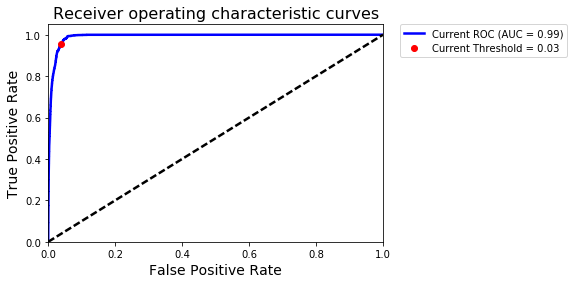

In [96]:
# super_features
(classifier, training_data, testing_data) = train_classifier(cleaned_df_all, super_features)
(err_tot, err_0, err_1, fpr_sf, tpr_sf, auc_sf) = test_classifier(classifier, testing_data, threshold=0.03)

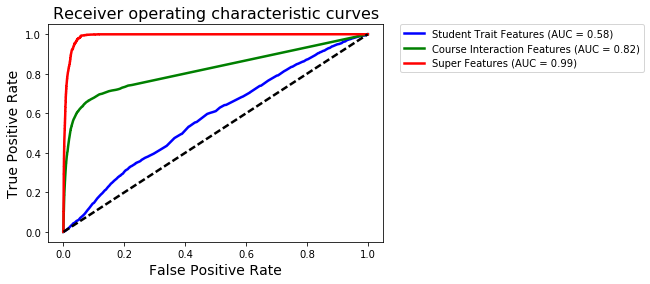

In [49]:
plt.figure()
plt.plot(fpr_st, tpr_st, 'b', linewidth=2.5, label='Student Trait Features (AUC = %0.2f)' % auc_st)
plt.plot(fpr_ci, tpr_ci, 'g', linewidth=2.5, label='Course Interaction Features (AUC = %0.2f)' % auc_ci)
plt.plot(fpr_sf, tpr_sf, 'r', linewidth=2.5, label='Super Features (AUC = %0.2f)' % auc_sf)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2.5)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver operating characteristic curves', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## 3.10 - Binary Classification Conclusions
Several things were accomplished in this section.
Starting with a clean dataframe of data we have done the following:
1. Selected specific features from the data to obtain a list of labeled points ```(label, feature_list)```
2. Split the labeled points into training and testing datasets
3. Trained a logistic regression classifier using the training dataset
4. Tested the logistic regression classifier using the testing dataset with percent error metrics as well as ROC metrics
5. Combined steps 1-4 into simple functions
6. Used the simple functions to train classifiers for the three sets of features
7. Compared the three different classifiers using an ROC plot with calculated AUC values

### Keep in mind: these features weren't all the same oer time! 

Our "super" features are _counts_ of the number of times stuents logged in and the number of chapters they read _at the end of the class_. 

Is this really a prediction?

What if we wanted to use chapters read at the halfway point?

---

# 4 - KMeans Clustering
A common type of unsupervised learning involves automatically clustering data based on the features.
We will now create clusters of students based on the features ```Age``` and ```nevents```.

As a first step, we will scale our features so that they are centered about their mean with unit standard deviations.
We will use the ```preprocessing``` function from ___scikit-learn___ to do this.

In [99]:
# Get dataframe keeping student trait features and course interaction features
# features  = cleaned_df_all[course_interaction_features]
features  = cleaned_df_all[["nevents", "Age"]]
certified = cleaned_df_all["certified"].tolist()
X_scaled  = preprocessing.scale(features)

## 4.1 - Basics of Kmeans Clustering
KMeans clustering is a simple method that takes data and a number of cluster centers ```k``` and returns the centers which best group the data.
A simple 2-d example is shown below [photo credit: Wikipedia].
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/ClusterAnalysis_Mouse.svg/450px-ClusterAnalysis_Mouse.svg.png)
The raw data is shown in the left panel and the results of KMeans Clustering with ```k=3``` is shown in the middle panel.
A more advanced method, EM Clustering, is shown in the right panel, see [Expectation-maximation algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) for more details.

## 4.2 - Plot different sets of features in 2d
We will now make plots of ```nevents``` and ```Age``` features using certification to color the points.
This set of features will be used since there are only 2 features in it, making it easy to visualize.
KMeans clustering will then be used to try to group the data.

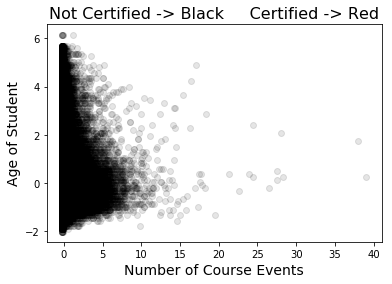

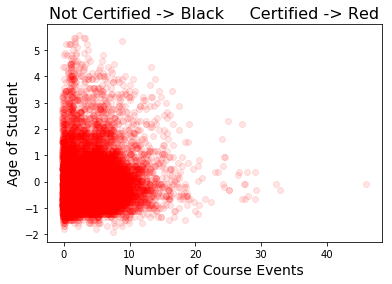

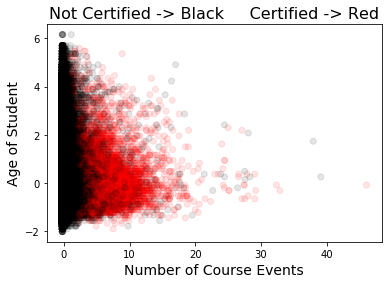

In [100]:
# Plot student traits (N_fourum_posts vs N_videos_watched)
x = [z[0] for z in X_scaled]
y = [z[1] for z in X_scaled]

# Define a function to make student's points red if they got certified
# and black if they did not get certified
def whatColor(label):
    if label == 0:
        return 'k'
    else:
        return 'r'
    
# Get a list of colors for the students to distinguish who got certified
c_plot = [whatColor(certified[i]) for i in range(len(certified))]

# Get individual lists of points for students who did and did not get certified
cert_0_x = []; cert_0_y = [];
cert_1_x = []; cert_1_y = [];
for i in range(len(c_plot)):
    if c_plot[i] == 'k':
        cert_0_x.append(x[i])
        cert_0_y.append(y[i])
    else:
        cert_1_x.append(x[i])
        cert_1_y.append(y[i]) 

# Plot only the students who did not get certified
plt.scatter(cert_0_x, cert_0_y, marker='o', color='k', alpha=0.1)
plt.xlabel('Number of Course Events', fontsize=14)
plt.ylabel('Age of Student', fontsize=14)
plt.title('Not Certified -> Black     Certified -> Red', fontsize=16)
plt.show()

# Plot only the students who did get certified
plt.scatter(cert_1_x, cert_1_y, marker='o', color='r', alpha=0.1)
plt.xlabel('Number of Course Events', fontsize=14)
plt.ylabel('Age of Student', fontsize=14)
plt.title('Not Certified -> Black     Certified -> Red', fontsize=16)
plt.show()

# Plot all students
plt.scatter(x, y, marker='o', color=c_plot, alpha=0.1)
plt.xlabel('Number of Course Events', fontsize=14)
plt.ylabel('Age of Student', fontsize=14)
plt.title('Not Certified -> Black     Certified -> Red', fontsize=16)
plt.show()

## 4.3 - Calculate KMeans for K=2..8 clusters and plot
We will now calculate the KMeans centers and average variance of points from centers for a range of cluster numbers.
We will then plot the average variance of datapoints from cluster centers as a function of the number of clusters used.

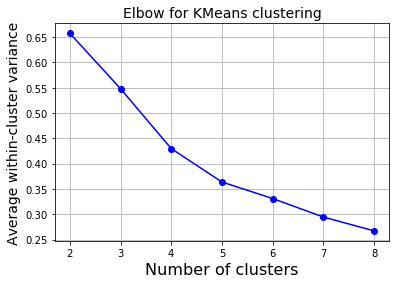

In [ ]:
##### cluster data into K=2..8 clusters #####
K = range(2,9)
KM = [kmeans(X_scaled,k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'bo-')
plt.grid(True)
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('Average within-cluster variance', fontsize=14)
plt.title('Elbow for KMeans clustering', fontsize=14)
plt.show()

## 4.4 - Plot Cluster Centers with Raw Data
We now have a list of cluster centers for different numbers of clusters.
We will use this to plot cluster centers with the raw data to see how the cluster centers look.

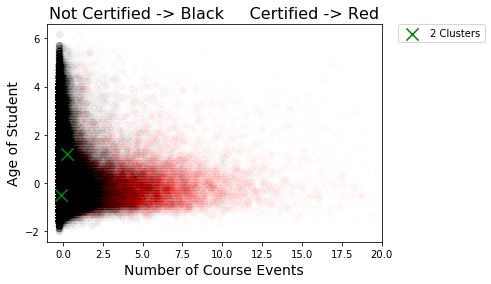

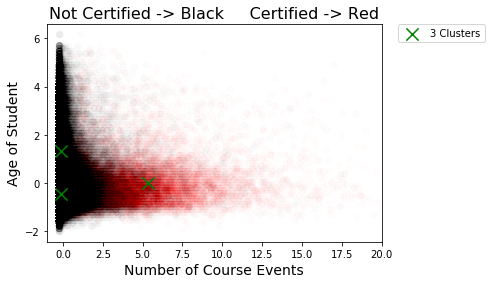

In [ ]:
for i in range(len(centroids)):
    K_center = centroids[i]
    x_centers = [center[0] for center in K_center]
    y_centers = [center[1] for center in K_center]

    # Plot all students
    plt.scatter(x, y, marker='o', color=c_plot, alpha=0.01)
    plt.scatter(x_centers, y_centers, marker='x', s=150, linewidths=2, color='g', label=str(i+2)+" Clusters")
    plt.xlabel('Number of Course Events', fontsize=14)
    plt.ylabel('Age of Student', fontsize=14)
    plt.title('Not Certified -> Black     Certified -> Red', fontsize=16)
    plt.xlim([-1,20])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

## 4.5 - Clean data a bit and try again
It seems that the overwhelming number of datapoints with a grade of 0 is making the clusters weighted heavily for lower grades.
Let's try removing all data with ```grade == 0``` and redo the plots we just made.

In [ ]:
## Get a new data set with only data that has grade != 0

# Get a dataframe with only "grade", "nevents", "Age", and "certified" columns from the cleaned_df_all dataframe
features_df  = cleaned_df_all[["grade", "nevents", "Age", "certified"]]

# Get a new dataframe "features_df_2" which only has rows from features_df which "grade" != 0
features_df_2 = features_df[features_df["grade"] != 0]

# Get a list of the certified column from "features_df_2" dataframe
certified = features_df_2["certified"].tolist()

# Scale the features "grade" and "Age" from "features_df_2" to be used for clustering
# You will have to only pass those columns from "features_df_2" to preprocessing
X_scaled  = preprocessing.scale(features_df_2[["nevents", "Age"]])

### 4.5.1 - Rerun the code to create a plot of average variance within clusters

In [ ]:
##### cluster data into K=2..8 clusters #####
K = range(2,9)
KM = [kmeans(X_scaled,k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'bo-')
plt.grid(True)
plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('Average within-cluster variance', fontsize=14)
plt.title('Elbow for KMeans clustering', fontsize=14)
plt.show()

### 4.5.2 - Rerun the code to create plots of cluster centers with raw data

In [ ]:
x = [z[0] for z in X_scaled]
y = [z[1] for z in X_scaled]
c_plot = [whatColor(certified[i]) for i in range(len(certified))]

for i in range(len(centroids)):
    K_center = centroids[i]
    x_centers = [center[0] for center in K_center]
    y_centers = [center[1] for center in K_center]

    # Plot all students
    plt.scatter(x, y, marker='o', color=c_plot, alpha=0.01)
    plt.scatter(x_centers, y_centers, marker='x', s=150, linewidths=2, color='g', label=str(i+2)+" Clusters")
    plt.xlabel('Number of Course Events', fontsize=14)
    plt.ylabel('Age of Student', fontsize=14)
    plt.title('Not Certified -> Black     Certified -> Red', fontsize=16)
    plt.xlim([-2,8])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

## 4.6 - KMeans Clustering Conclusions
In this section we have done the following:
1. Picked two continuous features, "grade" and "Age", to use for unsupervised learning using KMeans Clustering
2. Plotted "grade" vs "Age" while seperating students who recieved a certificate and those who did not using different colors
3. Trained a KMeans classifier using "grade" and "Age" for k=2..8 cluster centers
4. Plotted the cluster centers with the raw data
5. Cleaned our data to not include any students with "grade" == 0
6. Re-trained KMeans classifier using new cleaned data
7. Re-plotted new cluster centers with raw data